# CA5 for Atmospheric Thermodynamic

# Q1

## Import packages

In [2]:
import numpy as np
import Mog
import matplotlib.pyplot as plt

## Openfile and set parameters

In [3]:
H,P,T,RH = np.loadtxt(fname='46810-2018072200.edt.txt',dtype=float,usecols=(1,2,3,4),skiprows=3,delimiter=',',unpack=True)

# Turn T into Kelvin
T = T+273.15

# Find location of Tropopause
Tmin = np.amin(T)
TOS = H[3371]  

# Set perameters
Q = 0.03  # sensible heat flux [mK/s]
R = 1.2e-4  # latent heat flux [(kg*m)/(kg*s)]
Rd = 287  # [J/K*kg]
Rv = 461  # [J/K*kg]
epsilon = Rd/Rv
g0 = 9.80665  # [m/s^2]
Cp = 1004  # [J/K*kg]
Lv = 2.5e6  # [J/kg]
A = 2.53*10**9  # hPa
B = 5.42*10**3  # K

# Compute data
es = Mog.SaturationWaterVaporPressure(T)
e = es * RH * 0.01  # Water vapor pressure
qv = Mog.SpecificHumidity(P,e) 
theta = Mog.PotentialTemp(T,P)

## Smooth data

In [4]:
def make_absolutely_increasing(arr):
    """
    Takes an NDarray and returns an absolutely increasing NDarray with removed values set to np.NAN.
    """
    new_arr = np.empty_like(arr)  # create a new array with the same shape as the input array
    new_arr[:] = np.nan  # initialize all values to np.nan
    prev_val = arr[0]  # set the first value as the previous value
    new_arr[0] = prev_val  # set the first value of the new array as the first value of the input array
    for i in range(1, arr.shape[0]):
        val = arr[i]
        if val > prev_val:
            new_arr[i] = val
            prev_val = val
        else:
            new_arr[i] = np.nan
    return new_arr

def make_absolutely_decreasing(arr):
    """
    Takes an NDarray and returns an absolutely decreasing NDarray with removed values set to np.nan.
    """
    new_arr = np.empty_like(arr)  # create a new array with the same shape as the input array
    new_arr[:] = np.nan  # initialize all values to np.nan
    prev_val = arr[0]  # set the first value as the previous value
    new_arr[0] = prev_val  # set the first value of the new array as the first value of the input array
    for i in range(1, arr.shape[0]):
        val = arr[i]
        if val < prev_val:
            new_arr[i] = val
            prev_val = val
        else:
            new_arr[i] = np.nan
    return new_arr

def connect_breakpoints(x, y):
    # find NaN values in y array
    nan_mask = np.isnan(y)
    
    # interpolate missing values using linear interpolation
    y_interp = np.interp(x, x[~nan_mask], y[~nan_mask])
    
    return y_interp

x = np.linspace(0,len(theta),len(theta))
smooththeta = make_absolutely_increasing(theta)
smoothqv = make_absolutely_decreasing(qv)
smooththeta3 = connect_breakpoints(x,smooththeta)
smoothqv3 = connect_breakpoints(x,smoothqv)

## Plotting $Z$ versus $\theta$, and $Z$ versus $q_v$ 

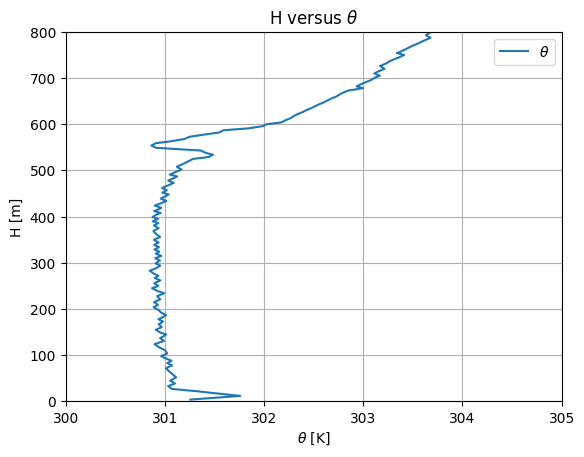

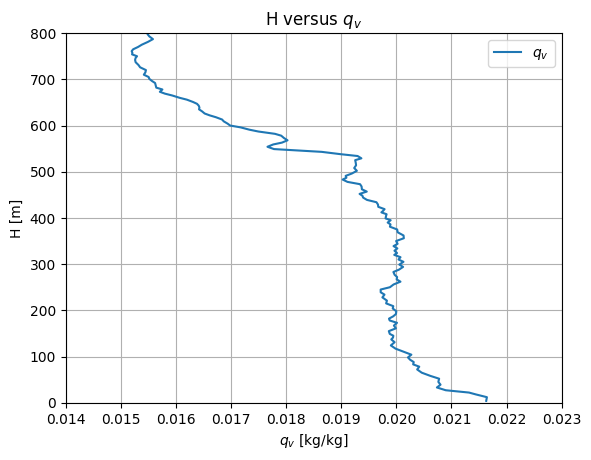

In [5]:
# Z-theta
#plt.plot(theta, H, alpha = 0.5)
plt.plot(theta, H, alpha = 1)
plt.xlabel(r'$\theta$ [K]')
plt.ylabel('H [m]')
plt.ylim(0,800)
plt.xlim(300,305)
plt.title(r'H versus $\theta$')
plt.legend([r'$\theta$'])
plt.grid()
plt.show()

# Z-qv
#plt.plot(qv, H, alpha = 0.5)
plt.plot(qv, H)
plt.xlabel('$q_{v}$ [kg/kg]')
plt.ylabel('H [m]')
plt.ylim(0,800)
plt.xlim(0.014,0.023)
plt.title('H versus $q_{v}$')
plt.legend(['$q_v$'])
plt.grid()
plt.show()

## Compute    $\displaystyle\int^{t}_{0} Q_{(t)} \ dt$, $\displaystyle\int^{t}_{0} R_{(t)}\ dt$


In [6]:
def area_under_curve_theta(array, datalocation):
    """
    Computes the area under the curve with respect to the y-axis of an NDarray using the trapezoidal rule.
    """
    area = 0
    if datalocation == 0:
        return 0.5*(H[0]-0)*(array[0])
    else:
        area = 0.5*(H[0]-0)*(array[0])
        for i in range(datalocation):
            dx = H[i+1] - H[i]
            area += (0.5 * dx * (array[i+1] + array[i]))
        return area

thetam = theta
qvv = qv

Hm = np.zeros(43201)
thetamix = np.zeros(43201)
qvmix = np.zeros(43201)
data = np.zeros(43201)
qv1000 = qv * 1000

for t in range(43200 + 1):
    Qt = Q * t
    Rt = R * t

    # initial
    thetas = thetam[0] * H[0]
    thetamm = thetam[0]
    qvs = qvv[0] * H[0]

    for i in range(6787):

        if (thetamm * H[i] - thetas >= Qt):
            Hm[t] = H[i]
            thetamix[t] = thetamm
            qvmix[t] = (qvs + Rt)/Hm[t]
            data[t] = i
            break
        
        else:
            if (thetam[i+1] < thetamm):
                thetamm = thetamm
            else:
                thetamm = thetam[i+1]
        
        thetas += (thetam[i] + thetam[i+1]) * (H[i+1] - H[i]) * 0.5
        qvs += (qvv[i] + qvv[i+1])*(H[i+1] - H[i]) * 0.5



## Testing area


In [7]:
print(len(data))

43201


## Plot $\theta_m$ versus time, $H_m$ versus time

C:\Users\User\AppData\Local\Temp\ipykernel_25612\2095622726.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = [0,1,2,3,4,5,6,7,8,9,10,11,12])


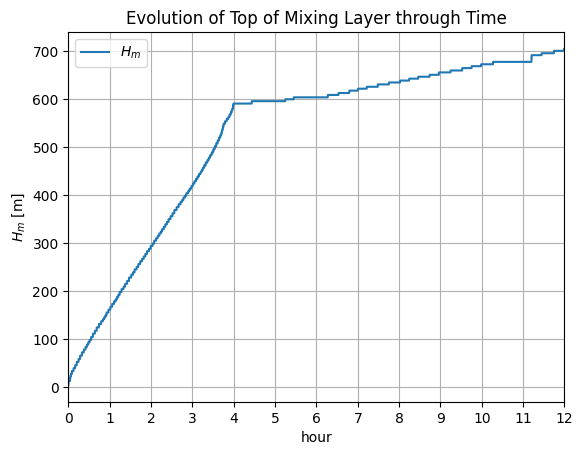

C:\Users\User\AppData\Local\Temp\ipykernel_25612\2095622726.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  bx.set_xticklabels(labels = [0,1,2,3,4,5,6,7,8,9,10,11,12])


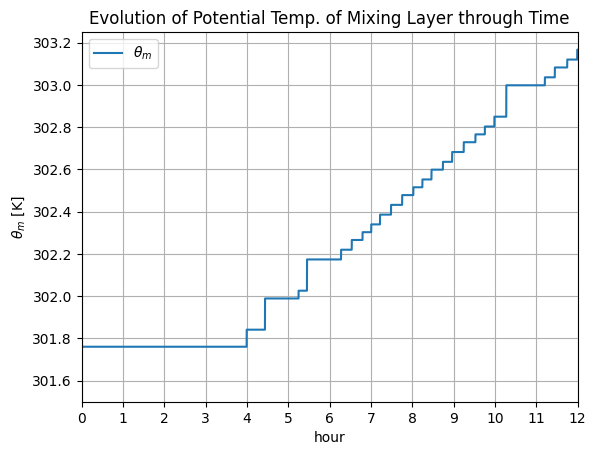

In [8]:
ax = plt.subplot()
ax.set_xticklabels(labels = [0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.plot(Hm)
plt.xticks(np.linspace(0,43200,13))
plt.xlim(0,43200)
plt.xlabel('hour')
plt.ylabel('$H_{m}$ [m]')
plt.title('Evolution of Top of Mixing Layer through Time')
plt.legend(['$H_{m}$'])
plt.grid()
plt.show()

bx = plt.subplot()
bx.set_xticklabels(labels = [0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.plot(thetamix)
plt.xticks(np.linspace(0,43200,13))
plt.xlim(0,43200)
plt.ylim(301.5,303.25)
plt.xlabel('hour')
plt.ylabel(r'$ \theta_{m}$ [K]')
plt.title('Evolution of Potential Temp. of Mixing Layer through Time')
plt.legend([r'$\theta_{m}$'])
plt.grid()
plt.show()

## Plot $q_v$ versus time

C:\Users\User\AppData\Local\Temp\ipykernel_25612\2566651979.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  cx.set_xticklabels(labels = [0,1,2,3,4,5,6,7,8,9,10,11,12])


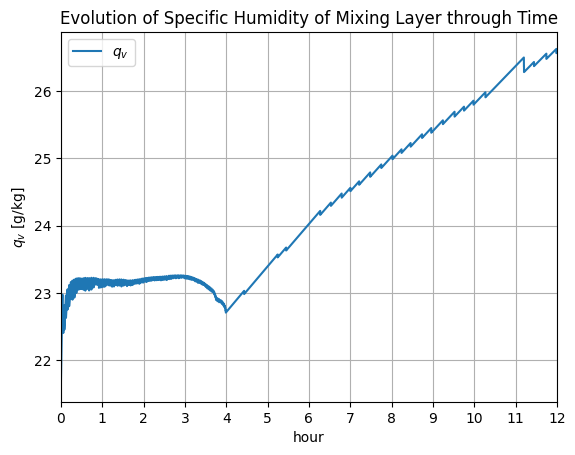

In [9]:
cx = plt.subplot()
cx.set_xticklabels(labels = [0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.plot(qvmix * 1000)
plt.xticks(np.linspace(0,43200,13))
plt.xlim(0,43200)
#plt.ylim(301.5,303.25)
plt.xlabel('hour')
plt.ylabel(r'$q_{v}$ [g/kg]')
plt.title('Evolution of Specific Humidity of Mixing Layer through Time')
plt.legend([r'$q_{v}$'])
plt.grid()
plt.show()

# Q2 

In [10]:
# Extract qv_mix at target time
data_time = 137  # the time of evolution
print(list(np.where(data == data_time)[0])[0])
print(H[data_time])
qv1000mix = np.zeros(6788)
for i in range(6788):
    if i <= data_time:  # data[-1] = 137, Top of mixing layer @12hr
        qv1000mix[i] = qvmix[data_time] * 1000
    else:
        qv1000mix[i] = qv1000[i]


# Substitude e as em
thetamix12 = np.zeros(len(theta), dtype=float)
for i in range(len(theta)):
    if i <= data_time:
        thetamix12[i] = thetamix[data_time]
    else:
        thetamix12[i] = theta[i]

T12 = thetamix12 / ((1000/P)**(Rd/Cp))  # Is T mix?


# Compute RH
deltaT = Q * list(np.where(data == data_time)[0])[0] / Cp  # Suppose mixing layer is homogenious, deltaT = Q*t/Cp
DeltaT = np.zeros(len(T))  # Whole array
for i in range(len(DeltaT)):
    if i <= data_time:  # Add deltaT to mixing layer, above mixing layer --> deltaT = 0
        DeltaT = deltaT
Tmix = T12 + DeltaT  # Is T mix?
esmix = Mog.SaturationWaterVaporPressure(Tmix)
emix = (P*(qv1000mix/1000))/((1-epsilon)*(qv1000mix/1000)+epsilon)
RHmix = emix/esmix*100

43154
705.0


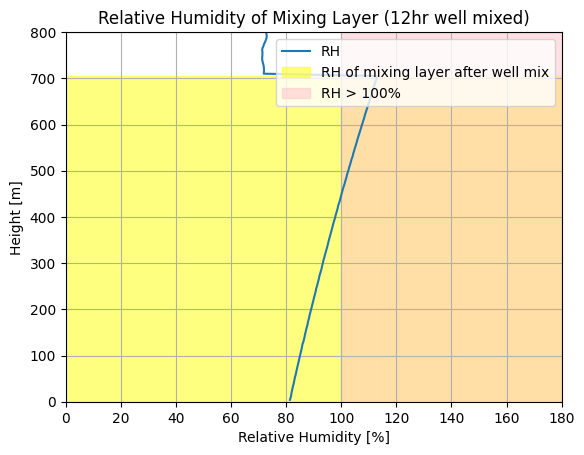

In [11]:
dx = plt.subplot()
plt.plot(RHmix, H)
plt.fill_between((0,200), 0, H[data_time], color = 'yellow', alpha = 0.5)
plt.fill_between((100,200), 0, H[-1], color = 'pink', alpha = 0.5)
plt.xlim(0,180)
plt.ylim(0,800)
#plt.ylim(0,H[-1])
plt.xlabel('Relative Humidity [%]')
plt.ylabel('Height [m]')
plt.title('Relative Humidity of Mixing Layer (12hr well mixed)')
plt.legend(['RH','RH of mixing layer after well mix', 'RH > 100%'])
plt.grid()
plt.show()

## Plot the RH evolution through time

In [12]:
'''
for k in range(138):

    # Extract qv_mix at target time
    data_time = k  # data[-1] = 137, Top of mixing layer @12hr
    print(H[data_time])
    
    qv1000mix = np.zeros(6788)
    for i in range(6788):
        if i < data_time:
            qv1000mix[i] = qvmix[data_time] * 1000
        else:
            qv1000mix[i] = qv1000[i]

    # Substitude e as em
    thetamix12 = np.zeros(len(theta), dtype=float)
    for i in range(len(theta)):
        if i <= data_time:
            thetamix12[i] = thetamix[data_time]
        else:
            thetamix12[i] = theta[i]

    T12 = thetamix12 / ((1000/P)**(Rd/Cp))  # Is T mix?


    # Compute RH
    deltaT = Q * list(np.where(data == data_time)[0])[0] / Cp
    DeltaT = np.zeros(len(T))
    for i in range(len(DeltaT)):
        if i <= data_time:
            DeltaT[i] = deltaT
    Tmix = T12 + DeltaT
    esmix = Mog.SaturationWaterVaporPressure(Tmix)
    emix = (P*(qv1000mix/1000))/((1-epsilon)*(qv1000mix/1000)+epsilon)
    RHmix = emix/esmix*100

    # Plot the figure
    ax = plt.subplot()
    plt.plot(RHmix, H)
    plt.fill_between((0,200), 0, H[data_time], color = 'yellow', alpha = 0.5)
    plt.fill_between((100,200), 0, H[-1], color = 'pink', alpha = 0.5)
    plt.xlim(0,200)
    plt.ylim(0,800)
    #plt.ylim(0,H[-1])
    plt.xlabel('Relative Humidity [%]')
    plt.ylabel('Height [m]')
    plt.title(f'Relative Humidity of Mixing Layer (after {list(np.where(data == data_time)[0])[0]} s well mixed)')
    plt.legend(['RH','RH of mixing layer after well mix', 'RH > 100%'], loc = 'upper left')
    plt.grid()
    plt.savefig(f'C:/Users/User/PROGRAM/111-2/ASThermodynamic/CA5/Evolution_of_RH/Evolution_of_RH{k}.png')
    plt.clf()
'''  

"\nfor k in range(138):\n\n    # Extract qv_mix at target time\n    data_time = k  # data[-1] = 137, Top of mixing layer @12hr\n    print(H[data_time])\n    \n    qv1000mix = np.zeros(6788)\n    for i in range(6788):\n        if i < data_time:\n            qv1000mix[i] = qvmix[data_time] * 1000\n        else:\n            qv1000mix[i] = qv1000[i]\n\n    # Substitude e as em\n    thetamix12 = np.zeros(len(theta), dtype=float)\n    for i in range(len(theta)):\n        if i <= data_time:\n            thetamix12[i] = thetamix[data_time]\n        else:\n            thetamix12[i] = theta[i]\n\n    T12 = thetamix12 / ((1000/P)**(Rd/Cp))  # Is T mix?\n\n\n    # Compute RH\n    deltaT = Q * list(np.where(data == data_time)[0])[0] / Cp\n    DeltaT = np.zeros(len(T))\n    for i in range(len(DeltaT)):\n        if i <= data_time:\n            DeltaT[i] = deltaT\n    Tmix = T12 + DeltaT\n    esmix = Mog.SaturationWaterVaporPressure(Tmix)\n    emix = (P*(qv1000mix/1000))/((1-epsilon)*(qv1000mix/1000)

## Plot $e_s$, $q_v$, and $\theta_m$, of 12hr well mix

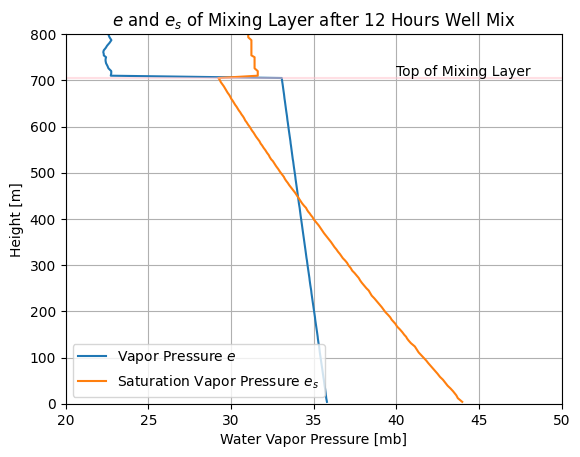

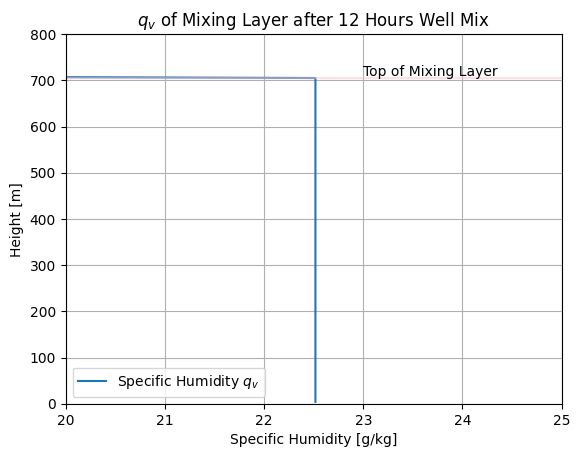

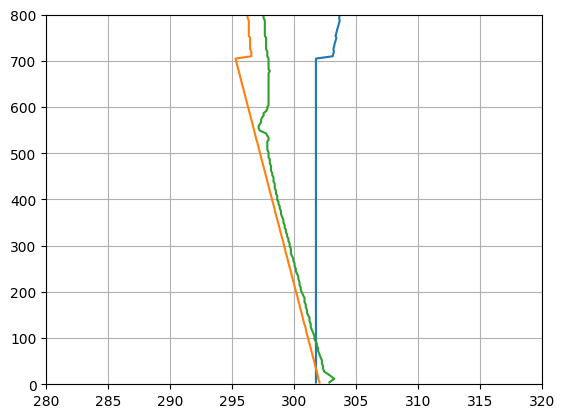

In [13]:
es12 = Mog.SaturationWaterVaporPressure(T12)

plt.plot(emix, H)
plt.plot(esmix, H)
plt.legend(['Vapor Pressure $e$', 'Saturation Vapor Pressure $e_s$'], loc = 'lower left')
plt.axhline(y = H[data_time], color = 'pink',alpha = 0.5)
plt.text(x = 40, y = H[data_time] + 5, s = 'Top of Mixing Layer')
plt.xlabel('Water Vapor Pressure [mb]')
plt.ylabel('Height [m]')
plt.ylim(0,800)
plt.xlim(20,50)
plt.title('$e$ and $e_s$ of Mixing Layer after 12 Hours Well Mix')
plt.grid()
plt.show()

plt.plot(qv1000mix, H)
plt.axhline(y = H[data_time], color = 'pink',alpha = 0.5)
plt.text(x = 23, y = H[data_time] + 5, s = 'Top of Mixing Layer')
plt.ylim(0,800)
plt.xlim(20,25)
plt.legend(['Specific Humidity $q_v$'], loc = 'lower left')
plt.xlabel('Specific Humidity [g/kg]')
plt.ylabel('Height [m]')
plt.title('$q_v$ of Mixing Layer after 12 Hours Well Mix')
plt.grid()
plt.show()

plt.plot(thetamix12, H)
plt.plot(T12, H)
plt.plot(T+deltaT, H)
plt.ylim(0,800)
plt.xlim(280,320)
plt.grid()
plt.show()

# Q2 Deal with condensation Rakuten's ver.

In [14]:
'''
qvs_top = epsilon * esmix[data_time] / P[data_time]

def solve_T_condensation (T_prime):
    Lv = 2.5e6
    A = 2.53*10**9  # hPa
    B = 5.42*10**3  # K
    T_top = T12[data_time]
    P_top = P[data_time]
    delta_qv = qv[data_time] - qvs_top
    f = Cp/Lv*(T_top-T_prime) + epsilon*A/P_top * (np.exp((-B/T_top)) - np.exp((-B/T_prime))) - delta_qv

    return f

def BisectionMethod(f, x1, x2, tolerance=1e-6):
    i = 0  # Initialize iteration counter
    if (x1 < x2) and (f(x1) * f(x2)) < 0:  # Check if the function values at x1 and x2 have opposite signs
        while (x2 - x1) >= tolerance:  # Loop until the interval between x1 and x2 is smaller than the tolerance
            i += 1  # Increment iteration counter
            x3 = (x2 + x1) / 2  # Compute the midpoint of x1 and x2
            if (f(x1) * f(x3)) < 0:  # Check if the function values at x1 and x3 have opposite signs
                x2 = x3  # Update x2 to x3
            elif (f(x1) * f(x3)) > 0:  # Check if the function values at x1 and x3 have the same sign
                x1 = x3  # Update x1 to x3
            elif (f(x3) == 0):  # Check if x3 is a root (i.e., f(x3) = 0)
                return x3  # Return the root
            else:
                print('Error')  # Print an error message if none of the above conditions are met
                return 0
            print('current ans= ', (x1 + x2) / 2, ' ,iterate times: ', i)  # Print the current approximation and iteration count
        return ((x1 + x2) / 2)  # Return the final approximation
    elif (f(x1) == 0):  # Check if x1 is a root (i.e., f(x1) = 0)
        return x1  # Return x1 as the root
    elif (f(x2) == 0):  # Check if x2 is a root (i.e., f(x2) = 0)
        return x2  # Return x2 as the root
    else:
        print('Invalid Input')  # Print an error message if the input is invalid
        return 0

T_prime = BisectionMethod(solve_T_condensation, 280, 320)
'''

"\nqvs_top = epsilon * esmix[data_time] / P[data_time]\n\ndef solve_T_condensation (T_prime):\n    Lv = 2.5e6\n    A = 2.53*10**9  # hPa\n    B = 5.42*10**3  # K\n    T_top = T12[data_time]\n    P_top = P[data_time]\n    delta_qv = qv[data_time] - qvs_top\n    f = Cp/Lv*(T_top-T_prime) + epsilon*A/P_top * (np.exp((-B/T_top)) - np.exp((-B/T_prime))) - delta_qv\n\n    return f\n\ndef BisectionMethod(f, x1, x2, tolerance=1e-6):\n    i = 0  # Initialize iteration counter\n    if (x1 < x2) and (f(x1) * f(x2)) < 0:  # Check if the function values at x1 and x2 have opposite signs\n        while (x2 - x1) >= tolerance:  # Loop until the interval between x1 and x2 is smaller than the tolerance\n            i += 1  # Increment iteration counter\n            x3 = (x2 + x1) / 2  # Compute the midpoint of x1 and x2\n            if (f(x1) * f(x3)) < 0:  # Check if the function values at x1 and x3 have opposite signs\n                x2 = x3  # Update x2 to x3\n            elif (f(x1) * f(x3)) > 0:  

In [15]:
'''
deltaT_top = T_prime - T12[data_time]
delta_qv = qvmix[data_time] - qvs_top
print(deltaT_top * Cp/Lv)
print(delta_qv)
'''

'\ndeltaT_top = T_prime - T12[data_time]\ndelta_qv = qvmix[data_time] - qvs_top\nprint(deltaT_top * Cp/Lv)\nprint(delta_qv)\n'

## Plot the fixed mixing layer


In [16]:
'''
#T_fix = T12 + deltaT_top
T_fix = np.zeros(len(T12), dtype=float)
for i in range(len(T12)):
    if i <= data_time:
        T_fix[i] = T12[i] + deltaT_top
    else:
        T_fix[i] = T12[i]

theta_fix = Mog.PotentialTemp(T_fix, P)
es_fix = Mog.SaturationWaterVaporPressure(T_fix)


#e_fix = emix - P * (Cp/Lv * (deltaT_top)) / epsilon
e_fix = np.zeros(len(emix), dtype=float)
for i in range(len(emix)):
    if i <= data_time:
        e_fix[i] = emix[i] - P[i] * (Cp/Lv * (deltaT_top)) / epsilon
    else:
        e_fix[i] = emix[i]


RH_fix = e_fix/es_fix*100

plt.plot(T_fix, H, color = 'blue')
plt.plot(T12, H, color = 'blue', alpha = 0.5)
plt.axhline(y = H[data_time], color = 'pink',alpha = 0.5)
plt.text(x = 300, y = H[data_time] + 5, s = 'Top of Mixing Layer')
plt.xlabel('Temperature [K]')
plt.ylabel('Height [m]')
plt.ylim(0,800)
plt.xlim(290,310)
plt.legend(['T after condensation', 'T'])
plt.title('T after condensation')
plt.grid()
plt.show()

plt.plot(theta_fix, H, color = 'blue')
plt.plot(thetamix12, H, color = 'blue', alpha = 0.5)
plt.axhline(y = H[data_time], color = 'pink',alpha = 0.5)
plt.text(x = 296, y = H[data_time] + 5, s = 'Top of Mixing Layer')
plt.xlabel('Potehtial Temp. [K]')
plt.ylabel('Height [m]')
plt.ylim(0,800)
plt.xlim(295,310)
plt.legend([r'$\theta$ after condensation', r'$\theta$'])
plt.title(r'$\theta$ after condensation')
plt.grid()
plt.show()

plt.plot(es_fix, H, color = 'blue')
plt.plot(es12, H, color = 'blue', alpha = 0.5)
plt.axhline(y = H[data_time], color = 'pink',alpha = 0.5)
plt.text(x = 35, y = H[data_time] + 5, s = 'Top of Mixing Layer')
plt.xlabel('Saturation Vapor Pressure [mb]')
plt.ylabel('Height [m]')
plt.ylim(0,800)
plt.xlim(25,50)
plt.legend(['$e_s$ after condensation', '$e_s$'])
plt.title('$e_s$ after condensation')
plt.grid()
plt.show()

plt.plot(e_fix, H, color = 'blue')
plt.plot(emix, H, color = 'blue', alpha = 0.5)
plt.axhline(y = H[data_time], color = 'pink',alpha = 0.5)
plt.text(x = 35, y = H[data_time] + 5, s = 'Top of Mixing Layer')
plt.xlabel('Vapor Pressure [mb]')
plt.ylabel('Height [m]')
plt.legend(['$e$ after condensation', '$e$'])
plt.title('$e$ after condensation')
plt.ylim(0,800)
plt.xlim(15,45)
plt.grid()
plt.show()

plt.plot(e_fix, H, color = 'blue')
plt.plot(es_fix, H, color = 'orange')
plt.plot(emix, H, color = 'blue', alpha = 0.3)
plt.plot(es12, H, color = 'orange', alpha = 0.3)
plt.axhline(y = H[data_time], color = 'pink',alpha = 0.5)
plt.text(x = 40, y = H[data_time] + 5, s = 'Top of Mixing Layer')
plt.legend(['$e$ after condensation','$e_s$ after condensation','$e$','$e_s$'])
plt.xlabel('Pressure [mb]')
plt.ylabel('Height [m]')
plt.title('Change of $e$ and $e_S$ in mixing layer after condensation')
plt.ylim(0,800)
plt.xlim(20,50)
plt.grid()
plt.show()

plt.plot(RH_fix, H)
plt.fill_between((100,200), 0, H[-1], color = 'pink', alpha = 0.5)
plt.axhline(y = H[data_time], color = 'red', alpha = 0.5)
plt.text(x = 10, y = H[data_time] + 5, s = 'Top of Mixing Layer')
plt.xlim(0,120)
plt.ylim(0,800)
#plt.ylim(0,H[-1])
plt.xlabel('Relative Humidity [%]')
plt.ylabel('Height [m]')
plt.title('Relative Humidity of Mixing Layer\n (12hr well mixed, condensation considered)')
plt.legend(['RH > 100%'])
plt.grid()
plt.show()
'''

"\n#T_fix = T12 + deltaT_top\nT_fix = np.zeros(len(T12), dtype=float)\nfor i in range(len(T12)):\n    if i <= data_time:\n        T_fix[i] = T12[i] + deltaT_top\n    else:\n        T_fix[i] = T12[i]\n\ntheta_fix = Mog.PotentialTemp(T_fix, P)\nes_fix = Mog.SaturationWaterVaporPressure(T_fix)\n\n\n#e_fix = emix - P * (Cp/Lv * (deltaT_top)) / epsilon\ne_fix = np.zeros(len(emix), dtype=float)\nfor i in range(len(emix)):\n    if i <= data_time:\n        e_fix[i] = emix[i] - P[i] * (Cp/Lv * (deltaT_top)) / epsilon\n    else:\n        e_fix[i] = emix[i]\n\n\nRH_fix = e_fix/es_fix*100\n\nplt.plot(T_fix, H, color = 'blue')\nplt.plot(T12, H, color = 'blue', alpha = 0.5)\nplt.axhline(y = H[data_time], color = 'pink',alpha = 0.5)\nplt.text(x = 300, y = H[data_time] + 5, s = 'Top of Mixing Layer')\nplt.xlabel('Temperature [K]')\nplt.ylabel('Height [m]')\nplt.ylim(0,800)\nplt.xlim(290,310)\nplt.legend(['T after condensation', 'T'])\nplt.title('T after condensation')\nplt.grid()\nplt.show()\n\nplt.pl

## Plot RH evolution through time with condensation

In [17]:
'''
def solve_T_condensation_evolution (T_prime):
    Lv = 2.5e6
    A = 2.53*10**9  # hPa
    B = 5.42*10**3  # K
    T_top = T12[data_time]
    P_top = P[data_time]
    delta_qv = qv[data_time] - qvs_top
    f = Cp/Lv*(T_top-T_prime) + epsilon*A/P_top * (np.exp((-B/T_top)) - np.exp((-B/T_prime))) - delta_qv

    return f



for k in range(138):

    # Extract qv_mix at target time
    data_time = k  # data[-1] = 137, Top of mixing layer @12hr
    print(H[data_time])
    
    qv1000mix = np.zeros(6788)
    for i in range(6788):
        if i < data_time:
            qv1000mix[i] = qvmix[data_time] * 1000
        else:
            qv1000mix[i] = qv1000[i]

    # Substitude e as em
    thetamix12 = np.zeros(len(theta), dtype=float)
    for i in range(len(theta)):
        if i <= data_time:
            thetamix12[i] = thetamix[data_time]
        else:
            thetamix12[i] = theta[i]

    T12 = thetamix12 / ((1000/P)**(Rd/Cp))  # Is T mix?


    # Compute RH
    deltaT = Q * list(np.where(data == data_time)[0])[0] / Cp
    DeltaT = np.zeros(len(T))
    for i in range(len(DeltaT)):
        if i <= data_time:
            DeltaT[i] = deltaT
    Tmix = T12 + DeltaT
    esmix = Mog.SaturationWaterVaporPressure(Tmix)
    emix = (P*(qv1000mix/1000))/((1-epsilon)*(qv1000mix/1000)+epsilon)

    # Consider condensation
    def solve_T_condensation_evolution(T_prime):
        Lv = 2.5e6
        A = 2.53*10**9  # hPa
        B = 5.42*10**3  # K
        T_top = T12[data_time]
        P_top = P[data_time]
        delta_qv = qv[data_time] - qvs_top
        f = Cp/Lv*(T_top-T_prime) + epsilon*A/P_top * (np.exp((-B/T_top)) - np.exp((-B/T_prime))) - delta_qv

        return f
    
    qvs_top = epsilon * esmix[data_time] / P[data_time]
    T_prime = BisectionMethod(solve_T_condensation_evolution, 200, 400)
    deltaT_top = T_prime - T12[data_time]
    delta_qv = qvmix[data_time] - qvs_top

    #T_fix = T12 + deltaT_top

    #-------------------------------------------------------------------------------
    #T_fix = T12 + deltaT_top
    T_fix = np.zeros(len(T12), dtype=float)
    for i in range(len(T12)):
        if i <= data_time:
            T_fix[i] = T12[i] + deltaT_top
        else:
            T_fix[i] = T12[i]

    theta_fix = Mog.PotentialTemp(T_fix, P)
    es_fix = Mog.SaturationWaterVaporPressure(T_fix)


    #e_fix = emix - P * (Cp/Lv * (deltaT_top)) / epsilon
    e_fix = np.zeros(len(emix), dtype=float)
    for i in range(len(emix)):
        if i <= data_time:
            e_fix[i] = emix[i] - P[i] * (Cp/Lv * (deltaT_top)) / epsilon
        else:
            e_fix[i] = emix[i]
    #------------------------------------------------------------------------------

    theta_fix = Mog.PotentialTemp(T_fix, P)
    es_fix = Mog.SaturationWaterVaporPressure(T_fix)
    #e_fix = emix - P * (Cp/Lv * (deltaT_top)) / epsilon
    RH_fix = e_fix/es_fix * 100

    # Plot the figure
    ax = plt.subplot()
    plt.plot(RH_fix, H)
    plt.fill_between((0,200), 0, H[data_time], color = 'yellow', alpha = 0.5)
    plt.fill_between((100,200), 0, H[-1], color = 'pink', alpha = 0.5)
    plt.xlim(0,200)
    plt.ylim(0,800)
    #plt.ylim(0,H[-1])
    plt.xlabel('Relative Humidity [%]')
    plt.ylabel('Height [m]')
    plt.title(f'Relative Humidity of Mixing Layer (after {list(np.where(data == data_time)[0])[0]} s well mixed)')
    plt.legend(['RH','RH of mixing layer after well mix', 'RH > 100%'], loc = 'upper left')
    plt.grid()
    plt.savefig(f'C:/Users/User/PROGRAM/111-2/ASThermodynamic/CA5/Evolution_of_RH_fix/Evolution_of_RH_fix{k}.png')
    plt.clf()
'''

"\ndef solve_T_condensation_evolution (T_prime):\n    Lv = 2.5e6\n    A = 2.53*10**9  # hPa\n    B = 5.42*10**3  # K\n    T_top = T12[data_time]\n    P_top = P[data_time]\n    delta_qv = qv[data_time] - qvs_top\n    f = Cp/Lv*(T_top-T_prime) + epsilon*A/P_top * (np.exp((-B/T_top)) - np.exp((-B/T_prime))) - delta_qv\n\n    return f\n\n\n\nfor k in range(138):\n\n    # Extract qv_mix at target time\n    data_time = k  # data[-1] = 137, Top of mixing layer @12hr\n    print(H[data_time])\n    \n    qv1000mix = np.zeros(6788)\n    for i in range(6788):\n        if i < data_time:\n            qv1000mix[i] = qvmix[data_time] * 1000\n        else:\n            qv1000mix[i] = qv1000[i]\n\n    # Substitude e as em\n    thetamix12 = np.zeros(len(theta), dtype=float)\n    for i in range(len(theta)):\n        if i <= data_time:\n            thetamix12[i] = thetamix[data_time]\n        else:\n            thetamix12[i] = theta[i]\n\n    T12 = thetamix12 / ((1000/P)**(Rd/Cp))  # Is T mix?\n\n\n    # C

# Q2 Deal with condensation Pohui's ver.

In [21]:

def BisectionMethod(f, i, x1, x2, tolerance=1e-6):
    j = 0  # Initialize iteration counter
    if (x1 < x2) and (f(x1,i) * f(x2,i)) < 0:  # Check if the function values at x1 and x2 have opposite signs
        while (x2 - x1) >= tolerance:  # Loop until the interval between x1 and x2 is smaller than the tolerance
            j += 1  # Increment iteration counter
            x3 = (x2 + x1) / 2  # Compute the midpoint of x1 and x2
            if (f(x1,i) * f(x3,i)) < 0:  # Check if the function values at x1 and x3 have opposite signs
                x2 = x3  # Update x2 to x3
            elif (f(x1,i) * f(x3,i)) > 0:  # Check if the function values at x1 and x3 have the same sign
                x1 = x3  # Update x1 to x3
            elif (f(x3,i) == 0):  # Check if x3 is a root (i.e., f(x3) = 0)
                return x3  # Return the root
            else:
                print('Error')  # Print an error message if none of the above conditions are met
                return 0
            #print('current ans= ', (x1 + x2) / 2, ' ,iterate times: ', j)  # Print the current approximation and iteration count
        return ((x1 + x2) / 2)  # Return the final approximation
    elif (f(x1,i) == 0):  # Check if x1 is a root (i.e., f(x1) = 0)
        return x1  # Return x1 as the root
    elif (f(x2,i) == 0):  # Check if x2 is a root (i.e., f(x2) = 0)
        return x2  # Return x2 as the root
    else:
        print('Invalid Input')  # Print an error message if the input is invalid
        return 0


def f(qvc, i):
    Tc = Tmix[i] + ((qv1000mix[i]/1000 - qvc) * Lv) / Cp
    f = qvc - epsilon * Mog.SaturationWaterVaporPressure(Tc) / P[i]
    return f

qvm_0 = epsilon * emix / P
qvs_0 = epsilon * esmix / P

qvm_1 = qvm_0.copy()
qvs_1 = qvs_0.copy()

qvc = np.zeros(len(qv))

H_cond = (H[np.where(qvm_0>=qvs_0)[0][0]])

for i in range(np.where(qvm_0>=qvs_0)[0][0],np.where(qvm_0>=qvs_0)[0][-1]+1):
    qvm_1[i] = BisectionMethod(f,i,0,0.03,1e-7)
    qvs_1[i] = BisectionMethod(f,i,0,0.03,1e-7)
    qvc[i] = BisectionMethod(f,i,0,0.03,1e-7)

qvc[qvc==0] = qvm_0[qvc==0]
Tc = Tmix + ((qvm_0-qvc)*Lv)/Cp
thc = Mog.PotentialTemp(Tc,P)
thetamix0 = Mog.PotentialTemp(Tmix,P)

emc = qvm_1 * P / epsilon
esc = qvs_1 * P / epsilon
em0 = qvm_0 * P / epsilon
es0 = qvs_0 * P / epsilon

RHc = emc / esc * 100

## Plot the condese qv and qvs

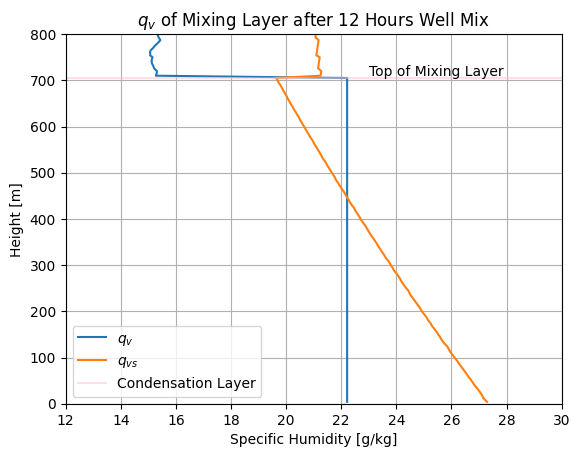

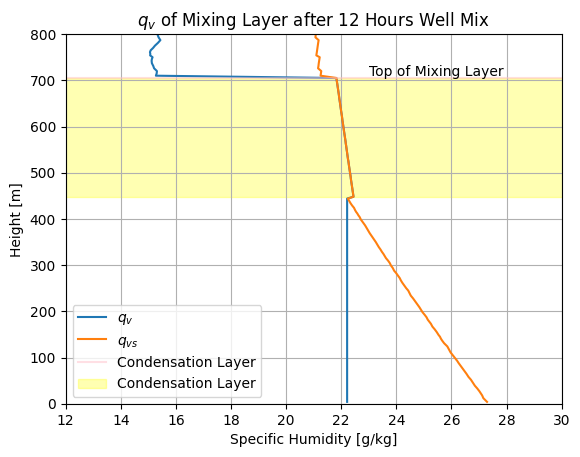

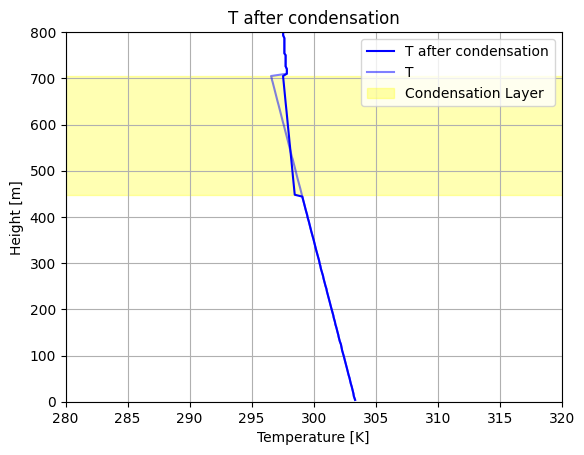

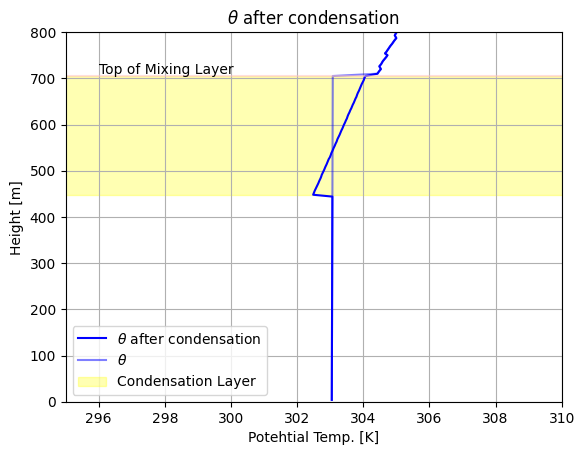

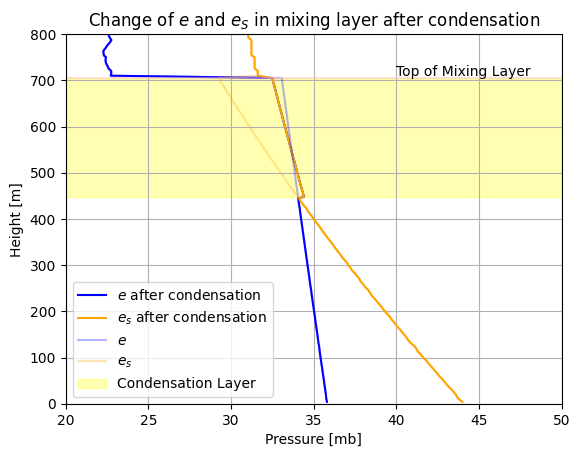

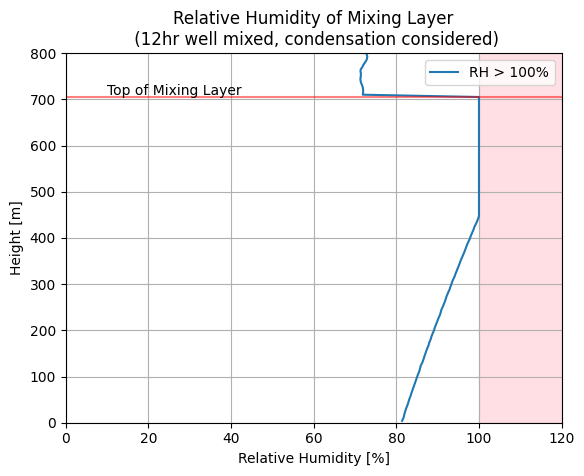

In [22]:

plt.plot(qvm_0 * 1000, H)
plt.plot(qvs_0 * 1000, H)
plt.axhline(y = H[data_time], color = 'pink',alpha = 0.5)
plt.text(x = 23, y = H[data_time] + 5, s = 'Top of Mixing Layer')
plt.ylim(0,800)
plt.xlim(12,30)
plt.legend(['$q_v$','$q_{vs}$','Condensation Layer'], loc = 'lower left')
plt.xlabel('Specific Humidity [g/kg]')
plt.ylabel('Height [m]')
plt.title('$q_v$ of Mixing Layer after 12 Hours Well Mix')
plt.grid()
plt.show()

plt.plot(qvm_1 * 1000, H)
plt.plot(qvs_1 * 1000, H)
plt.axhline(y = H[data_time], color = 'pink',alpha = 0.5)
plt.text(x = 23, y = H[data_time] + 5, s = 'Top of Mixing Layer')
plt.fill_between((0, 50), H_cond, H[data_time], color = 'yellow',alpha = 0.3)
plt.ylim(0,800)
plt.xlim(12,30)
plt.legend(['$q_v$','$q_{vs}$','Condensation Layer','Condensation Layer'], loc = 'lower left')
plt.xlabel('Specific Humidity [g/kg]')
plt.ylabel('Height [m]')
plt.title('$q_v$ of Mixing Layer after 12 Hours Well Mix')
plt.grid()
plt.show()

plt.plot(Tc, H, 'blue')
plt.plot(Tmix, H, 'blue', alpha = 0.5)
plt.fill_between((0, 500), H_cond, H[data_time], color = 'yellow',alpha = 0.3)
plt.ylim(0,800)
plt.xlim(280,320)
plt.xlabel('Temperature [K]')
plt.ylabel('Height [m]')
plt.legend(['T after condensation', 'T','Condensation Layer'])
plt.title('T after condensation')
plt.grid()
plt.show()

plt.plot(thc, H, 'blue')
plt.plot(thetamix0, H, color = 'blue', alpha = 0.5)
plt.text(x = 296, y = H[data_time] + 5, s = 'Top of Mixing Layer')
plt.fill_between((0, 500), H_cond, H[data_time], color = 'yellow',alpha = 0.3)
plt.axhline(y = H[data_time], color = 'pink',alpha = 0.5)
plt.xlabel('Potehtial Temp. [K]')
plt.ylabel('Height [m]')
plt.ylim(0,800)
plt.xlim(295,310)
plt.legend([r'$\theta$ after condensation', r'$\theta$','Condensation Layer'])
plt.title(r'$\theta$ after condensation')
plt.grid()
plt.show()

plt.plot(emc, H, color = 'blue')
plt.plot(esc, H, color = 'orange')
plt.plot(em0, H, color = 'blue', alpha = 0.3)
plt.plot(es0, H, color = 'orange', alpha = 0.3)
plt.text(x = 40, y = H[data_time] + 5, s = 'Top of Mixing Layer')
plt.fill_between((0, 50), H_cond, H[data_time], color = 'yellow',alpha = 0.3)
plt.axhline(y = H[data_time], color = 'pink',alpha = 0.5)
plt.legend(['$e$ after condensation','$e_s$ after condensation','$e$','$e_s$','Condensation Layer'])
plt.xlabel('Pressure [mb]')
plt.ylabel('Height [m]')
plt.title('Change of $e$ and $e_S$ in mixing layer after condensation')
plt.ylim(0,800)
plt.xlim(20,50)
plt.grid()
plt.show()

plt.plot(RHc, H)
plt.fill_between((100,200), 0, H[-1], color = 'pink', alpha = 0.5)
plt.axhline(y = H[data_time], color = 'red', alpha = 0.5)
plt.text(x = 10, y = H[data_time] + 5, s = 'Top of Mixing Layer')
plt.xlim(0,120)
plt.ylim(0,800)
#plt.ylim(0,H[-1])
plt.xlabel('Relative Humidity [%]')
plt.ylabel('Height [m]')
plt.title('Relative Humidity of Mixing Layer\n (12hr well mixed, condensation considered)')
plt.legend(['RH > 100%'])
plt.grid()
plt.show()
